In [32]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

*   For looking at word vectors, we are using Gensim.
  * Gensim isn't really a deep learning package. It is a package for word and text similarity modeling, which started with LDA-style topic models and grew into SVD and neural word representations. It is efficient and scalable, and widely used.

* We are using the GloVe word vectors, offered by Stanford. We can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside this [zip file](https://nlp.stanford.edu/data/glove.6B.zip).

* We are using the 100d vectors for this example. This will give us speed and smallness with some quality. We can use other versions of 50d and 300d depending on the requirements of quality and speed.


### Get the word vector files

In [3]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2024-02-08 20:37:41--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-02-08 20:37:41--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.00MB/s    in 2m 39s  

2024-02-08 20:40:28 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [4]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


### Loading the word vector files

In [7]:
glove_file = datapath('/work/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile('glove.6B.100d.word2vec.txt')
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [8]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [9]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [10]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [11]:
model.most_similar(negative='banana')

[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

In [12]:
result = model.most_similar(positive = ['woman', 'king'], negative = ['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [13]:
def analogy(x1, x2, y1):
  result = model.most_similar(positive = [y1, x2], negative = [x1])
  return result[0][0]

In [15]:
analogy('japan', 'japanese', 'australia')

'australian'

In [17]:
analogy('australia', 'beer', 'france')

'champagne'

In [18]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [36]:
analogy('tall', 'tallest', 'long')

'longest'

In [20]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [21]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal
/root/venv/lib/python3.9/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [33]:
def display_pca_scatterplot(model,words=None,sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()),sample)
        else:
            words = [word for word in model.vocab]
    
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

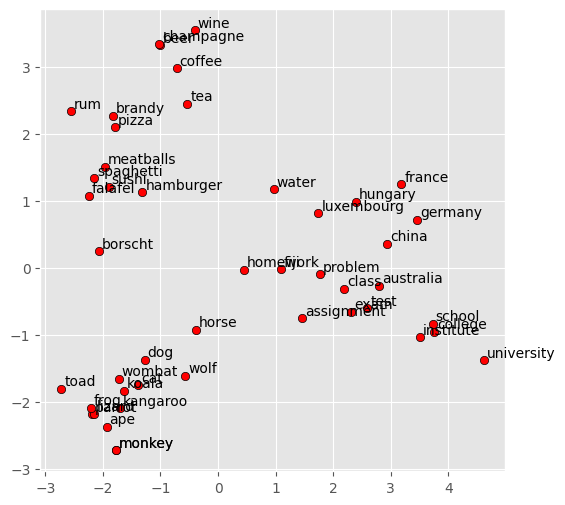

In [34]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

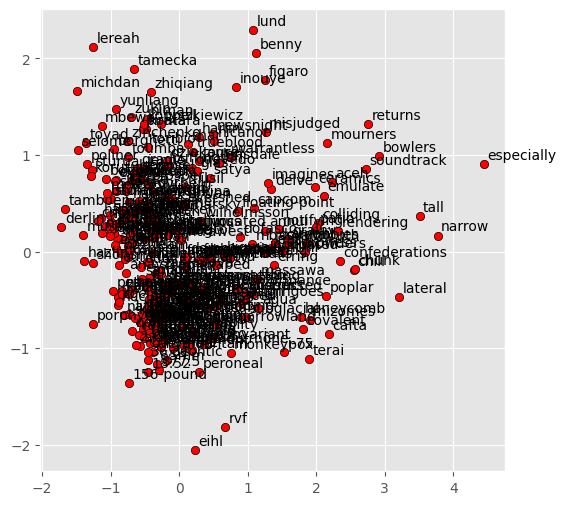

In [35]:
display_pca_scatterplot(model, sample=300)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2cdf3c92-207a-4bb9-9e07-df7ed41a6df4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>